<a href="https://colab.research.google.com/github/vilacco/catboost/blob/main/catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/train.csv') #kaggle - Natural Language Processing with Disaster Tweets#

In [35]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
df.target.mean()            

0.4296597924602653

In [6]:
from sklearn.model_selection import train_test_split

In [10]:
train = df.sample(frac=0.8).copy()
validation = df[~df.index.isin(train.index)]

In [11]:
len(validation) + len(train)

7613

In [ ]:
! pip install catboost

In [ ]:
! pip install catboost --upgrade

In [14]:
from catboost import CatBoostClassifier

In [15]:
model = CatBoostClassifier() 

In [16]:
df.columns


Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [30]:
X_ = ['text']
Y_ = ['target']

In [31]:
text_features = ['text']

In [33]:
model = CatBoostClassifier(text_features = text_features, verbose=30)

In [34]:
model.fit(train[X_], train[Y_], eval_set = (validation[X_], validation[Y_]))

Learning rate set to 0.049512
0:	learn: 0.6766456	test: 0.6761453	best: 0.6761453 (0)	total: 394ms	remaining: 6m 33s
30:	learn: 0.5075053	test: 0.5001634	best: 0.5001634 (30)	total: 6.26s	remaining: 3m 15s
60:	learn: 0.4878317	test: 0.4819956	best: 0.4819956 (60)	total: 12s	remaining: 3m 4s
90:	learn: 0.4789122	test: 0.4767006	best: 0.4766954 (89)	total: 17.8s	remaining: 2m 57s
120:	learn: 0.4724780	test: 0.4752346	best: 0.4751150 (117)	total: 23.5s	remaining: 2m 50s
150:	learn: 0.4666008	test: 0.4736050	best: 0.4734606 (147)	total: 29.2s	remaining: 2m 44s
180:	learn: 0.4590904	test: 0.4711036	best: 0.4711036 (180)	total: 35s	remaining: 2m 38s
210:	learn: 0.4509736	test: 0.4688345	best: 0.4687559 (209)	total: 40.7s	remaining: 2m 32s
240:	learn: 0.4428220	test: 0.4680808	best: 0.4680132 (237)	total: 46.4s	remaining: 2m 26s
270:	learn: 0.4349358	test: 0.4673671	best: 0.4673671 (270)	total: 52.2s	remaining: 2m 20s
300:	learn: 0.4277092	test: 0.4678655	best: 0.4673171 (281)	total: 57.9s	re

In [38]:
model.predict(validation[X_]).mean()

0.3026920551543007

In [39]:
from sklearn.metrics import f1_score, classification_report

In [40]:
tt = pd.DataFrame({'y_true': validation['target'].copy(), 'y_pred': model.predict(validation[X_])})

In [41]:
tt

,y_true,y_pred
3,1,1
12,1,1
19,0,0
38,1,1
45,0,0
...,...,...
7590,1,1
7594,1,0
7596,1,1
7601,1,1


In [42]:
f1_score(tt['y_true'],tt['y_pred'])

0.6970802919708029

In [43]:
print(classification_report(tt['y_true'],tt['y_pred']))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       888
           1       0.83      0.60      0.70       635

    accuracy                           0.78      1523
   macro avg       0.80      0.76      0.76      1523
weighted avg       0.79      0.78      0.77      1523



In [44]:
classification_threshold = 0

In [45]:
tt['y_score'] = model.predict_proba(validation[X_])[:,1]

In [46]:
tt

,y_true,y_pred,y_score
3,1,1,0.975050
12,1,1,0.582293
19,0,0,0.302323
38,1,1,0.729434
45,0,0,0.157784
...,...,...,...
7590,1,1,0.951655
7594,1,0,0.357061
7596,1,1,0.924884
7601,1,1,0.965404


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

In [48]:
fpr, tpr, thr = roc_curve(tt['y_true'], tt['y_score'])

In [49]:
roc_df = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thr':thr})

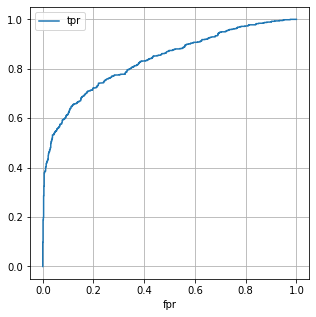

In [51]:
roc_df.plot(x='fpr', y='tpr', figsize= (5,5), grid = True)

In [53]:
roc_auc_score(tt['y_true'],tt['y_score'])

0.8348735546570192

In [61]:
roc_df['lr'] = roc_df['tpr'] - roc_df['fpr']

In [62]:
roc_df.sort_values('lr', ascending = False)

,fpr,tpr,thr,lr
177,0.118243,0.655118,0.416124,0.536875
171,0.111486,0.647244,0.437850,0.535758
179,0.122748,0.658268,0.410816,0.535520
175,0.117117,0.651969,0.424451,0.534851
173,0.115991,0.650394,0.425228,0.534403
...,...,...,...,...
2,0.000000,0.006299,0.988927,0.006299
516,0.996622,1.000000,0.065452,0.003378
1,0.000000,0.001575,0.992234,0.001575
0,0.000000,0.000000,1.992234,0.000000


In [63]:
classification_threshold = 0.416124

In [64]:
tt['y_pred_1'] = (tt['y_score'] >= classification_threshold) * 1

In [65]:
tt

,y_true,y_pred,y_score,y_pred_1
3,1,1,0.975050,1
12,1,1,0.582293,1
19,0,0,0.302323,0
38,1,1,0.729434,1
45,0,0,0.157784,0
...,...,...,...,...
7590,1,1,0.951655,1
7594,1,0,0.357061,0
7596,1,1,0.924884,1
7601,1,1,0.965404,1


In [66]:
print(classification_report(tt['y_true'],tt['y_pred']))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       888
           1       0.83      0.60      0.70       635

    accuracy                           0.78      1523
   macro avg       0.80      0.76      0.76      1523
weighted avg       0.79      0.78      0.77      1523



In [68]:
print(classification_report(tt['y_true'],tt['y_pred_1']))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       888
           1       0.80      0.65      0.72       635

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.79      0.78      1523



In [70]:
test = pd.read_csv('/content/test.csv')

In [73]:
X_test = ['text'] 

In [74]:
test['y_score'] = model.predict_proba(test[X_test])[:,1]

In [79]:
test['target'] = (test['y_score'] >= classification_threshold) * 1

In [80]:
test

,id,keyword,location,text,y_score,y_pred,target
0,0,NaN,NaN,Just happened a terrible car crash,0.772622,1,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",0.640346,1,1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",0.515972,1,1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0.565654,1,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,0.985583,1,1
...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,0.320313,0,0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,0.404491,0,0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,0.958198,1,1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,0.853106,1,1


In [81]:
test[['id', 'target']].to_csv('pred.csv', index = False)